In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import healpy as hp
import matplotlib.pylab as plt

In [2]:
survey_length = 20  # days
# Define what we want the final visit ratio map to look like
target_map = fs.standard_goals()['r']

bfs = []
bfs.append(fs.Depth_percentile_basis_function())
bfs.append(fs.Target_map_basis_function(target_map=target_map))
bfs.append(fs.Quadrant_basis_function())
bfs.append(fs.Slewtime_basis_function())

weights = np.array([.5,1.,  1., 1.])
survey = fs.Simple_greedy_survey_fields(bfs, weights, block_size=10)
scheduler = fs.Core_scheduler([survey])

observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length)

AttributeError: module 'lsst.sims.featureScheduler' has no attribute 'Quadrant_basis_function'

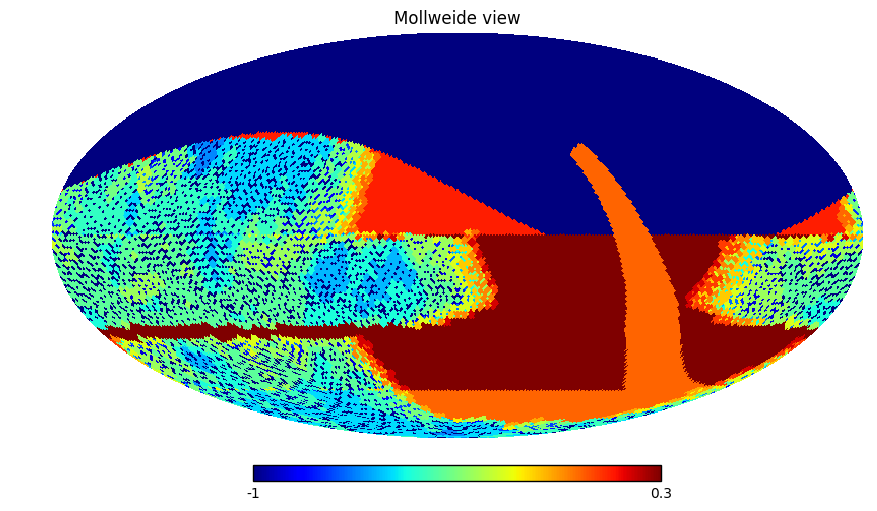

In [3]:
hp.mollview(scheduler.surveys[0].basis_functions[1](), min=-1)

In [4]:
scheduler.surveys[0].basis_functions[3]()

1.0